In [ ]:
#################################################################################
############------- Machine Learning Inmersion ------------######################
#################################################################################
# Capacitador: André Omar Chávez Panduro
# email: andrecp38@gmail.com / andre.chavez@urp.edu.pe
# Sesion02 : Algoritmos de Clasificacion: Arboles de Decision
# version: 1.0
#################################################################################

![image.png](attachment:image.png)

In [ ]:
##################################################
## Desarrollo de Modelos de Machine Learning
##################################################

In [ ]:
## Leemos las librerias necesarias para poder trabajar

In [ ]:
#Importar las librerías necesarias en Python.
import pandas as pd ## Manejo de dataframes o set de datos
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt2 ## Todo lo referente a gráficas y demás.
import matplotlib as plt
import numpy as np ## Todo lo referente a trabajar con vectores y matrices
from scipy import stats ## Herramientas y algoritmos matemáticos para python
import seaborn as sns # Se basa en Matplotlib y la complementa en el tema de graficos y demás.

%matplotlib inline

In [ ]:
## Leemos los datos o el dataset a trabajar

In [ ]:
# Leemos la data de desarrollo de modeolos

# Leer el dataset en un dataframe usando pandas

In [ ]:
desarrll.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [ ]:
# Dimension

# Son 614 obs con 13 columnas

(614, 13)

In [ ]:
#Leer los primeros registros.
# Podemos ver la estructura de los datos, es el str de Python
desarrll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [ ]:
## Analisis Exploratorio de los datos

![image.png](attachment:image.png)

In [ ]:
#### Recurso: https://www.analyticsvidhya.com/blog/2014/07/statistics/

In [ ]:
desarrll.describe() #Resumen de la información cuantitativa

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


La función describe () proporcionaría count - conteo o número de elementos, mean - media, standard deviation (std) - desviación estándar, min - mínimo, cuartiles y max - máximo en su salida. Sólo considera las variables en formato de número.

In [ ]:
## Aquí hay algunas conclusiones importantes

1. LoanAmount tiene (614 – 592) 22 valores perdidos.
2. Loan_Amount_Term tiene (614 – 600) 14 valores perdidos.
3. Credit_History tiene (614 – 564) 50 valores perdidos.
4. Nosotros podemos también observar que cerca del 84% de los solicitantes al préstamo tienen un historial crediticio. ¿Cómo? La media del campo Credit_History es 0.84 (Recordemos, Credit_History tiene o toma el valor 1 para aquellos que tienen historial crediticio y 0 en caso contrario).
5. La variable ApplicantIncome parece estar en línea con las espectativas al igual que CoapplicantIncome.

In [ ]:
# Tabla Resumen
desarrll.describe(include='all') # Describir todas las variables.

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001722,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [ ]:
# Gráficos para variables cuantitativas
#Histogramas y Cajas

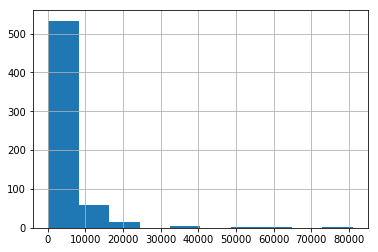

In [ ]:
# Análisis Univariado de los atributos del data set
%matplotlib inline
import matplotlib.pyplot as plt
desarrll['ApplicantIncome'].hist()


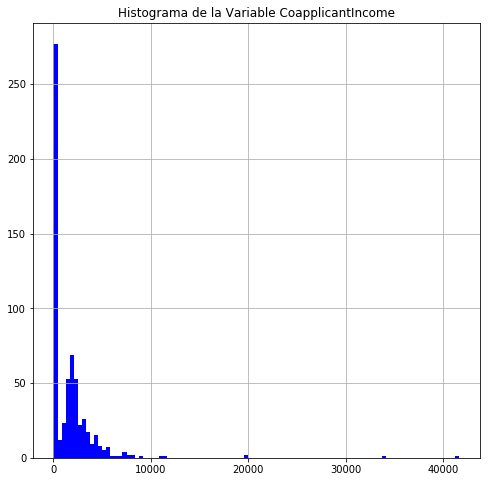

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.title('Histograma de la Variable CoapplicantIncome')
desarrll['CoapplicantIncome'].hist(figsize=(8,8),color="blue",bins=100)

In [ ]:
## Cuartiles y diagramas de cajas


Los cuartiles son los tres valores de la variable estadística que dividen a un conjunto de datos ordenados en cuatro partes iguales. Q1, Q2 y Q3 determinan los valores correspondientes al 25%, al 50% y al 75% de los datos. Q2 coincide con la mediana.

Los diagramas de cajas son una presentación visual que describe varias características importantes al mismo tiempo, tales como la dispersión y simetría. Para su realización se representan los tres cuartiles y los valores mínimo y máximo de los datos, sobre un rectángulo, alineado horizontal o verticalmente. Estos gráficos nos proporcionan abundante información y son sumamente útiles para encontrar valores atípicos y comparar dos conjunto de datos.



![image.png](attachment:image.png)

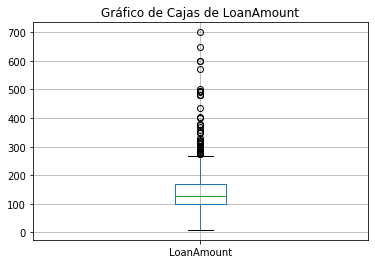

In [ ]:
# Gráfico de Cajas
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.title('Gráfico de Cajas de LoanAmount')
desarrll.boxplot(column='LoanAmount')

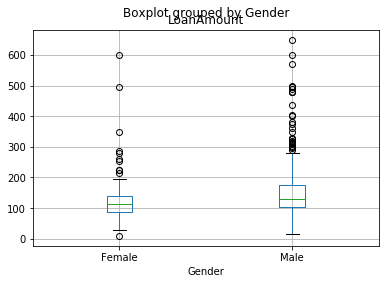

In [ ]:
desarrll.boxplot('LoanAmount',by='Gender')

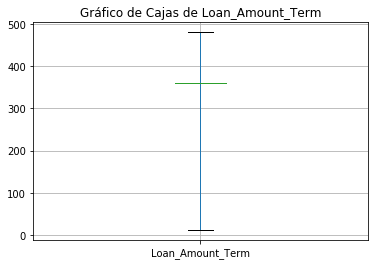

In [ ]:
import matplotlib.pyplot as plt
plt.title('Gráfico de Cajas de Loan_Amount_Term')
desarrll.boxplot(column='Loan_Amount_Term',autorange='T',showfliers='T',notch=0, sym='+', vert=1, whis=1.5)

In [ ]:
########################################
# Tratamiento de valores missings
########################################

In [ ]:
# Poner codigo *

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

![image.png](attachment:image.png)

In [ ]:
# Visualizamos los valores perdidos respecto a las variables cualititativas
desarrll.Gender.value_counts(dropna=False)

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64

In [ ]:
# No olvidemos separar las variables cualitativas para poder trabajarlas eficientemente
columnas_categoricas = ["Gender","Married","Education","Self_Employed","Property_Area","Dependents","Loan_Status"]

In [ ]:
# Separamos las columnas numericas
columnas_numericas = ["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"]

In [ ]:
# Imputamos los valores cualitativos por Moda
desarrll.Gender = desarrll.Gender.fillna("Male")
desarrll.Married = desarrll.Married.fillna("Yes")
desarrll.Self_Employed = desarrll.Self_Employed.fillna("Yes")
desarrll.Credit_History = desarrll.Credit_History.fillna("1")
desarrll.Dependents = desarrll.Dependents.fillna("0")

In [ ]:
#desarrll.isnull().sum()

In [ ]:
# Preprocesamiento con LabelEncoder

from sklearn.preprocessing import LabelEncoder # PasoN°01: Importo la libreria a usar
for c in columnas_categoricas:
    print(str(c))
    le = LabelEncoder()                     #   PasoN°02: Instancio la funcion a desarrollar
    le.fit(desarrll[str(c)])                #   PasoN°03: Ajusto la funcion
    desarrll[str(c)]=le.transform(desarrll[str(c)]) #   PasoN°04: Ejecuto la funcion

Gender
Married
Education
Self_Employed
Property_Area
Dependents
Loan_Status


In [ ]:
desarrll.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,NaN,360.0,1,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1,2,1


In [ ]:
desarrll.Dependents = desarrll.Dependents.astype('int32')

In [ ]:
#desarrll.isnull().sum()

In [ ]:
# Imputamos los valores cuantitativos por Media o Mediana
## Median
for c in columnas_numericas:
    median = desarrll[c].median()
    desarrll[c].fillna(median, inplace=True)

In [ ]:
# Revisamos si la recodigicación fue la idónea
desarrll.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
########################################
## Feature Enginnering ##
########################################

![image.png](attachment:image.png)

In [ ]:
## Creación de Variables por Decision de Negocio o de acuerdo a metodologías más automatizadas es el
# corazon de Machine Learning
# También conocido como proceso de Feature Engineering, no olvidar que todo lo que le hacemos al Train o Entrenamiento se lo
# debemos hacer a la data de scoreo o data productiva.

In [ ]:
desarrll.shape

(614, 13)

In [ ]:
desarrll.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1,2,1


In [ ]:
# Ingenieria de datos
#Creamos las variables para el entrenamiento o train

desarrll['TotalIncome']    = desarrll['ApplicantIncome'] + desarrll['CoapplicantIncome']
desarrll['Log_LoanAmount'] = round(np.log(desarrll['LoanAmount']+1),2)

In [ ]:
desarrll['AmountxTerm']    = round(desarrll['LoanAmount']/desarrll['Loan_Amount_Term'],2)
desarrll["Cuota_Ingreso1"] = (1000*desarrll["LoanAmount"]/desarrll["Loan_Amount_Term"])/(desarrll["ApplicantIncome"])
desarrll["Cuota_Ingreso2"] = (1000*desarrll["LoanAmount"]/desarrll["Loan_Amount_Term"])/(desarrll["TotalIncome"])
desarrll["Cuota_Ingreso_Hijo"] = (1000*desarrll["LoanAmount"]/desarrll["Loan_Amount_Term"])/(desarrll["TotalIncome"]/(desarrll["Dependents"]+1))


In [ ]:
# Revisamos las variables creadas, derrepente queremos crear algunas más?
#desarrll.shape
desarrll.head(4)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,Log_LoanAmount,AmountxTerm,Cuota_Ingreso1,Cuota_Ingreso2,Cuota_Ingreso_Hijo
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1,2,1,5849.0,4.86,0.36,0.060789,0.060789,0.060789
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,0,6091.0,4.86,0.36,0.077581,0.058374,0.116748
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1,2,1,3000.0,4.20,0.18,0.061111,0.061111,0.061111
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1,2,1,4941.0,4.80,0.33,0.129049,0.067463,0.067463


In [ ]:
# Quitamos el ID
desarrll= desarrll.drop('Loan_ID',axis=1)

In [ ]:
########################################
# Particion Muestral de los datos
########################################

![image.png](attachment:image.png)

In [ ]:
# Le quitamos la variable Loan_ID o identificador único para poder modelar la información 
#desarrll = desarrll.drop('Loan_ID', axis=1) # Axis=1
desarrll.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,Log_LoanAmount,AmountxTerm,Cuota_Ingreso1,Cuota_Ingreso2,Cuota_Ingreso_Hijo
0,1,0,0,0,0,5849,0.0,128.0,360.0,1,2,1,5849.0,4.86,0.36,0.060789,0.060789,0.060789
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,0,6091.0,4.86,0.36,0.077581,0.058374,0.116748


In [ ]:
## Si deseamos balancear, podemos hacerlo con toda la informacion?
# Creación de la data de train y la data de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(desarrll.drop('Loan_Status', axis=1), # (X,y,%test,estratificacion)
                                                    desarrll['Loan_Status'], 
                                                    test_size=0.30,
                                                    stratify=desarrll['Loan_Status'],
                                                    random_state=100)

In [ ]:
########################################
# Selección de Variables
########################################

![image.png](attachment:image.png)

In [ ]:
from sklearn import metrics

In [ ]:
desarrll.shape # Eliminamos el ID

(614, 18)

In [ ]:
# Seleccion por Random Forest
from sklearn.ensemble import RandomForestClassifier # Paso01: Instancio el algoritmo
forest = RandomForestClassifier()                   # Paso02: Configuro el algoritmo
forest.fit(X_train, y_train)                        # Paso03: Ajuste el algoritmo
importances = forest.feature_importances_           # Variables importantes


In [ ]:
forest.feature_importances_

array([0.00557598, 0.01052415, 0.01830336, 0.01807836, 0.01705776,
       0.07085555, 0.05037329, 0.07978892, 0.02539365, 0.23813119,
       0.01913936, 0.08590338, 0.05654674, 0.0477104 , 0.08712794,
       0.06707188, 0.1024181 ])

In [ ]:
# Seleccion por Random Forest
TablaImportancia = pd.concat([pd.DataFrame({'Driver':list(X_train.columns)}),
                              pd.DataFrame({'Importancia':list(forest.feature_importances_)})], axis = 1)
ImportanciaVariables = TablaImportancia[['Driver','Importancia']].sort_values('Importancia', ascending = False).reset_index(drop = True)
ImportanciaVariables

,Driver,Importancia
0,Credit_History,0.238131
1,Cuota_Ingreso_Hijo,0.102418
2,Cuota_Ingreso1,0.087128
3,TotalIncome,0.085903
4,LoanAmount,0.079789
5,ApplicantIncome,0.070856
6,Cuota_Ingreso2,0.067072
7,Log_LoanAmount,0.056547
8,CoapplicantIncome,0.050373
9,AmountxTerm,0.047710


In [ ]:
# Instalamos Boruta
# ! pip install Boruta

In [ ]:
# Seleccion Boruta (Permutaciones de arboles)
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

rfc = RandomForestClassifier()
boruta_selector = BorutaPy(rfc, n_estimators=20,verbose=2)

x=X_train.values
y=y_train.values

boruta_selector.fit(x,y)

print("==============BORUTA==============")
print (boruta_selector.n_features_)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	17
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	3
Rejected: 	14
Iteration: 	9 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	14
Iteration: 	10 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	14
Iteration: 	11 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	14
Iteration: 	12 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	14
Iteration: 	13 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	14
Iteration: 	14 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	14
Iteration: 	15 / 100
Confirmed: 	1
Tentative: 	2
Rejected: 	14
Iteration: 	16 / 100
Confirmed: 	1
Tentative: 	1
Rejected: 	15
I

In [ ]:
# Observamos cual de las variables el algoritmo eligio
X_train_Bor = X_train.columns[boruta_selector.support_]

In [ ]:
X_train_Bor

Index(['Credit_History', 'TotalIncome'], dtype='object')

In [ ]:
# Si deseamos , podemos elegir las variables mas importantes
X_train_subset =X_train[["Credit_History","Cuota_Ingreso1","Cuota_Ingreso_Hijo","LoanAmount"]]

In [ ]:
X_train_subset.head(3)

,Credit_History,Cuota_Ingreso1,Cuota_Ingreso_Hijo,LoanAmount
544,1,0.093912,0.076993,102.0
13,1,0.170894,0.067476,114.0
383,1,0.049610,0.049610,128.0


In [ ]:
########################################
# Modelamiento de los datos
########################################

![image.png](attachment:image.png)

In [ ]:
## Modelos Supervisados : Arbol CART ##

In [ ]:
# Paso N°01: Llamar un algoritmo predictivos
from sklearn.tree import DecisionTreeClassifier
#Parámetros del árbol de clasificación
# criterion  , splitter ,max_depth,min_impurity_decrease,min_impurity_split,min_samples_leaf,min_samples_split,splitter
cart = DecisionTreeClassifier(criterion='entropy',max_depth=5,max_features="sqrt")
cart.fit(X_train, y_train) # Entrenamos el algoritmo

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [ ]:
# Paso N°04: Predecir con el algoritmo entrenado para validar
y_pred_train=cart.predict(X_train) # Prediccion sobre el train
y_pred_test= cart.predict(X_test) # Prediccion sobre el test

In [ ]:
# Paso N°05: Comparar el valor pronosticado con el valor real

from sklearn import metrics as metrics
# Matriz de confusion
print("Matriz confusion: Train")
cm_train = metrics.confusion_matrix(y_train,y_pred_train)
print(cm_train)

print("Matriz confusion: Test")
cm_test = metrics.confusion_matrix(y_test,y_pred_test)
print(cm_test)

# Accuracy
print("Accuracy: Train")
accuracy_train=metrics.accuracy_score(y_train,y_pred_train)
print(accuracy_train)

print("Accuracy: Test")
accuracy_test=metrics.accuracy_score(y_test,y_pred_test)
print(accuracy_test)

# Precision
print("Precision: Train")
precision_train=metrics.precision_score(y_train,y_pred_train)
print(precision_train)

print("Precision: Test")
precision_test=metrics.precision_score(y_test,y_pred_test)
print(precision_test)

# Recall
print("Recall: Train")
recall_train=metrics.recall_score(y_train,y_pred_train)
print(recall_train)

print("Recall: Test")
recall_test=metrics.recall_score(y_test,y_pred_test)
print(recall_test)

Matriz confusion: Train
[[ 72  62]
 [  5 290]]
Matriz confusion: Test
[[ 27  31]
 [  8 119]]
Accuracy: Train
0.8438228438228438
Accuracy: Test
0.7891891891891892
Precision: Train
0.8238636363636364
Precision: Test
0.7933333333333333
Recall: Train
0.9830508474576272
Recall: Test
0.937007874015748


In [ ]:
#! pip install --user plot_metric
#! pip install h5py

In [ ]:
# Instalamos la libreria plot_metric para visualizar nuestros resultados
from plot_metric.functions import BinaryClassification

In [ ]:
bc = BinaryClassification(y_test, y_pred_test, labels=["No Prestamo", "Prestamo"])

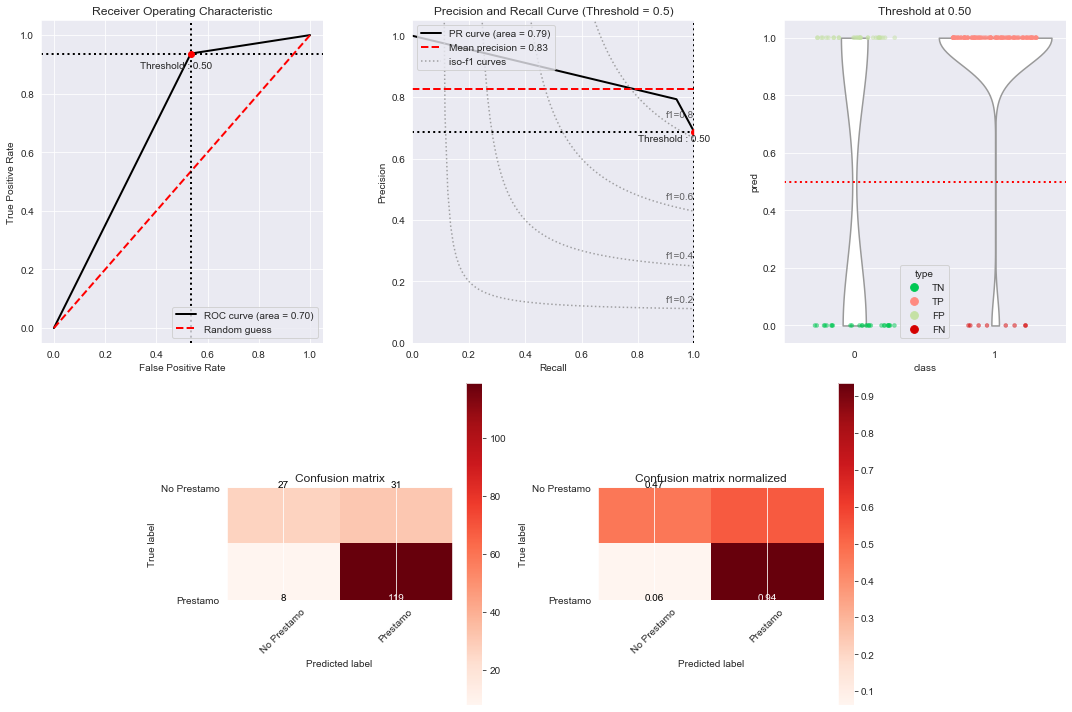

                   ________________________
                  |  Classification Report |
                   ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
              precision    recall  f1-score   support

 No Prestamo       0.77      0.47      0.58        58
    Prestamo       0.79      0.94      0.86       127

    accuracy                           0.79       185
   macro avg       0.78      0.70      0.72       185
weighted avg       0.79      0.79      0.77       185



In [ ]:
# Grafico de Indicadores de Validacion
plt.figure(figsize=(15,10))
plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
bc.plot_roc_curve()
plt.subplot2grid((2,6), (0,2), colspan=2)
bc.plot_precision_recall_curve()
plt.subplot2grid((2,6), (0,4), colspan=2)
bc.plot_class_distribution()
plt.subplot2grid((2,6), (1,1), colspan=2)
bc.plot_confusion_matrix()
plt.subplot2grid((2,6), (1,3), colspan=2)
bc.plot_confusion_matrix(normalize=True)
plt.show()
bc.print_report()

In [ ]:
##################################################
## Implementación de Modelos de Machine Learning
##################################################

In [ ]:
# Leemos el dataset de implementacion, podria ser una informacion a enivar a campanas
implemt = pd.read_csv("C:/Users/Andre Chavez/Desktop/Data/test.csv") 

In [ ]:
# Todo lo realizado en el dataset de entrenamiento del modelo lo debemos replicar en el dataset de scoring

In [ ]:
# Imputamos los valores cualitativos por Moda

implemt.Gender = implemt.Gender.fillna("Male")
implemt.Married = implemt.Married.fillna("Yes")
implemt.Self_Employed = implemt.Self_Employed.fillna("Yes")
implemt.Credit_History = implemt.Credit_History.fillna("1")
implemt.Dependents = implemt.Dependents.fillna("0")

In [ ]:
# Separamos los features categoricos y los numericos
columnas_categoricas = ["Gender","Married","Education","Self_Employed","Property_Area","Dependents"]
columnas_numericas = ["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"]

In [ ]:
# Preprocesamiento con LabelEncoder
from sklearn.preprocessing import LabelEncoder
for c in columnas_categoricas:
    print(str(c))
    le = LabelEncoder()
    le.fit(implemt[str(c)])
    implemt[str(c)]=le.transform(implemt[str(c)]) 

Gender
Married
Education
Self_Employed
Property_Area
Dependents


In [ ]:
# Imputamos los valores cuantitativos por Media o Mediana
for c in columnas_numericas:
    median = implemt[c].median()
    implemt[c].fillna(median, inplace=True)

In [ ]:
implemt.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [ ]:
#implemt.ApplicantIncome.value_counts()

In [ ]:
# Ingenieria de datos
#Creamos las mismas variables que utilizamos en el train
implemt['TotalIncome']    = implemt['ApplicantIncome'] + implemt['CoapplicantIncome']
implemt['Log_LoanAmount'] = round(np.log(implemt['LoanAmount']+1),2)

In [ ]:
implemt['AmountxTerm']    = round(implemt['LoanAmount']/implemt['Loan_Amount_Term'],2)
implemt["Cuota_Ingreso1"] = (1000*implemt["LoanAmount"]/implemt["Loan_Amount_Term"])/(implemt["ApplicantIncome"] +1)
implemt["Cuota_Ingreso2"] = (1000*implemt["LoanAmount"]/implemt["Loan_Amount_Term"])/(implemt["TotalIncome"] +1)
implemt["Cuota_Ingreso_Hijo"] = (1000*implemt["LoanAmount"]/implemt["Loan_Amount_Term"])/(implemt["TotalIncome"]/(implemt["Dependents"]+1))


In [ ]:
## Una vez que tenemos todas las variables podemos scorear o puntuar los registros

In [ ]:
implemt.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,Log_LoanAmount,AmountxTerm,Cuota_Ingreso1,Cuota_Ingreso2,Cuota_Ingreso_Hijo
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1,2,5720,4.71,0.31,0.053409,0.053409,0.053419


In [ ]:
df_scoring = implemt.drop("Loan_ID",axis=1)

In [ ]:
df_scoring.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
TotalIncome           0
Log_LoanAmount        0
AmountxTerm           0
Cuota_Ingreso1        0
Cuota_Ingreso2        0
Cuota_Ingreso_Hijo    0
dtype: int64

In [ ]:
df_scoring.Credit_History = df_scoring.Credit_History.astype('int')

In [ ]:
df_scoring.shape

(367, 17)

In [ ]:
# Predecimos con la data nueva
y_scoring = cart.predict(df_scoring)

In [ ]:
# Predecimos sobre el set de datos de implementacion con el modelo entrenado
# Juntamos el ID con la clase
data = np.hstack((implemt['Loan_ID'].values.reshape(-1,1), y_scoring.reshape(-1,1)))
# Le asignamos nombres a las columnas
df_submmit = pd.DataFrame(data, columns=['Loan_ID','Loan_Status'])
# Convertimos al formato solicitado por Analytics Vidhya
df_submmit['Loan_Status']=["Y" if i == 1 else "N" for i in df_submmit['Loan_Status']]
# Exportamos la solucion
df_submmit.to_csv('Sol_Cart.csv', index=False)

In [ ]:
# Listo , objetivo cumplido

In [ ]:
# Fin !!